In [9]:
from flask import Blueprint
import numpy as np
import pandas as pd
import pickle
import copy
from sklearn.preprocessing import MinMaxScaler
import requests
import pandas_datareader.data as web
import datetime
import matplotlib.pyplot as plt
from pandas import Series
from numpy import nan
import copy
import math
start = datetime.datetime(2013,1,1)
end = datetime.datetime(2022,2,24)

In [10]:
y_code = "BTC-USD"
y = web.DataReader(y_code,'yahoo',start,end)

<AxesSubplot:xlabel='Date'>

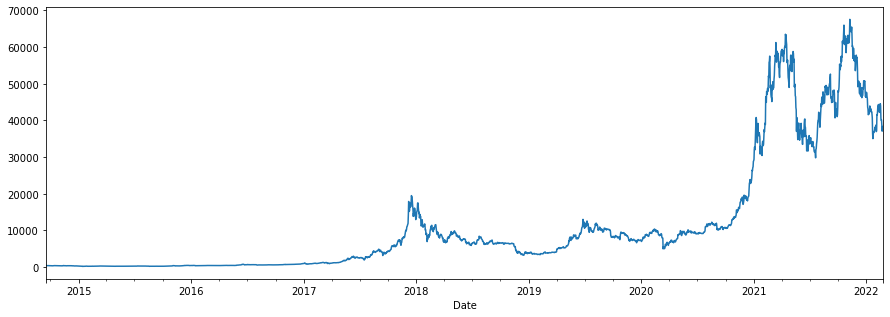

In [11]:
y["Close"].plot(figsize=(15,5))

In [13]:
def difference(dataset, interval=1):
	temp = copy.deepcopy(dataset)

	#dataset[i][j]
	for j in range(len(dataset[0])):
		for i in range(interval, len(dataset)):
			if math.isnan(dataset[i-interval][j]):
				t = interval
				while math.isnan(dataset[i-t][j]) and i>=t:
					t += 1
				value = dataset[i][j] - dataset[i-t][j]
				temp[i][j] = value
				
			else:
				value = dataset[i][j] - dataset[i-interval][j]
				temp[i][j] = value
	return temp


params = ['Volume', 'Close']
x_data_sub1 = y[params]

diff = difference(x_data_sub1.values)
x_data_sub1.iloc[:,:] = diff
data = x_data_sub1.iloc[1:,:]

C:\Users\Go\miniconda3\envs\pro1\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


In [14]:
data

,Volume,Close
Date,,
2014-09-18,1.342640e+07,-32.894012
2014-09-19,3.436500e+06,-29.644012
2014-09-20,-1.056100e+06,14.108002
2014-09-21,-1.028350e+07,-10.082977
2014-09-22,-2.452500e+06,3.330994
...,...,...
2022-02-20,4.604019e+09,-1690.777344
2022-02-21,1.093983e+10,-1356.097656
2022-02-22,-3.787252e+09,1210.746094


In [61]:
time_lag = 365
full_dataset = copy.deepcopy(data)
for i in range(1,time_lag):
    temp = data.shift(periods=-i)
    temp.columns = temp.columns + f'-{time_lag-i}'
    full_dataset = pd.concat([full_dataset,temp],axis=1)
test1 = data.loc[:,'Close'].map(lambda x: 1 if (x>=0) else 0)
test2 = test1.shift(periods=-time_lag)
full_dataset = pd.concat([full_dataset,test2],axis=1)
full_dataset = full_dataset.dropna()

In [62]:
full_dataset

,Volume,Close,Volume-364,Close-364,Volume-363,Close-363,Volume-362,Close-362,Volume-361,Close-361,...,Close-5,Volume-4,Close-4,Volume-3,Close-3,Volume-2,Close-2,Volume-1,Close-1,Close
Date,,,,,,,,,,,,,,,,,,,,,
2014-09-18,1.342640e+07,-32.894012,3.436500e+06,-29.644012,-1.056100e+06,14.108002,-1.028350e+07,-10.082977,-2.452500e+06,3.330994,...,-4.717010,2.519000e+06,0.132004,-1.820000e+06,-0.339996,9.664000e+05,-1.212997,-1.208800e+06,0.718994,1.0
2014-09-19,3.436500e+06,-29.644012,-1.056100e+06,14.108002,-1.028350e+07,-10.082977,-2.452500e+06,3.330994,2.097190e+07,33.638977,...,0.132004,-1.820000e+06,-0.339996,9.664000e+05,-1.212997,-1.208800e+06,0.718994,1.306800e+06,3.165009,0.0
2014-09-20,-1.056100e+06,14.108002,-1.028350e+07,-10.082977,-2.452500e+06,3.330994,2.097190e+07,33.638977,-1.447180e+07,-12.585999,...,-0.339996,9.664000e+05,-1.212997,-1.208800e+06,0.718994,1.306800e+06,3.165009,-7.529600e+06,-1.482010,0.0
2014-09-21,-1.028350e+07,-10.082977,-2.452500e+06,3.330994,2.097190e+07,33.638977,-1.447180e+07,-12.585999,-3.813300e+06,-11.630981,...,-1.212997,-1.208800e+06,0.718994,1.306800e+06,3.165009,-7.529600e+06,-1.482010,1.732100e+06,-0.280991,0.0
2014-09-22,-2.452500e+06,3.330994,2.097190e+07,33.638977,-1.447180e+07,-12.585999,-3.813300e+06,-11.630981,-5.353600e+06,-7.149017,...,0.718994,1.306800e+06,3.165009,-7.529600e+06,-1.482010,1.732100e+06,-0.280991,5.234100e+06,-4.126999,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-20,4.649963e+09,211.386719,-1.624787e+10,1440.425781,4.015484e+10,-3332.625000,1.405007e+10,-5382.894531,-4.240697e+10,880.906250,...,1988.285156,-2.929111e+09,-613.343750,6.454115e+09,-3423.847656,-2.936655e+09,-507.035156,-9.573450e+09,91.179688,0.0
2021-02-21,-1.624787e+10,1440.425781,4.015484e+10,-3332.625000,1.405007e+10,-5382.894531,-4.240697e+10,880.906250,-9.188955e+09,-2611.480469,...,-613.343750,6.454115e+09,-3423.847656,-2.936655e+09,-507.035156,-9.573450e+09,91.179688,4.604019e+09,-1690.777344,0.0
2021-02-22,4.015484e+10,-3332.625000,1.405007e+10,-5382.894531,-4.240697e+10,880.906250,-9.188955e+09,-2611.480469,2.964614e+11,-754.089844,...,-3423.847656,-2.936655e+09,-507.035156,-9.573450e+09,91.179688,4.604019e+09,-1690.777344,1.093983e+10,-1356.097656,1.0


* 테스트

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from hyperopt import fmin, tpe, hp, Trials, space_eval, STATUS_OK
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold

In [64]:
trainset, testset = train_test_split(full_dataset,test_size=0.1,shuffle=False)

In [65]:
trainset.head()

,Volume,Close,Volume-364,Close-364,Volume-363,Close-363,Volume-362,Close-362,Volume-361,Close-361,...,Close-5,Volume-4,Close-4,Volume-3,Close-3,Volume-2,Close-2,Volume-1,Close-1,Close
Date,,,,,,,,,,,,,,,,,,,,,
2014-09-18,13426400.0,-32.894012,3436500.0,-29.644012,-1056100.0,14.108002,-10283500.0,-10.082977,-2452500.0,3.330994,...,-4.717010,2519000.0,0.132004,-1820000.0,-0.339996,966400.0,-1.212997,-1208800.0,0.718994,1.0
2014-09-19,3436500.0,-29.644012,-1056100.0,14.108002,-10283500.0,-10.082977,-2452500.0,3.330994,20971900.0,33.638977,...,0.132004,-1820000.0,-0.339996,966400.0,-1.212997,-1208800.0,0.718994,1306800.0,3.165009,0.0
2014-09-20,-1056100.0,14.108002,-10283500.0,-10.082977,-2452500.0,3.330994,20971900.0,33.638977,-14471800.0,-12.585999,...,-0.339996,966400.0,-1.212997,-1208800.0,0.718994,1306800.0,3.165009,-7529600.0,-1.482010,0.0
2014-09-21,-10283500.0,-10.082977,-2452500.0,3.330994,20971900.0,33.638977,-14471800.0,-12.585999,-3813300.0,-11.630981,...,-1.212997,-1208800.0,0.718994,1306800.0,3.165009,-7529600.0,-1.482010,1732100.0,-0.280991,0.0
2014-09-22,-2452500.0,3.330994,20971900.0,33.638977,-14471800.0,-12.585999,-3813300.0,-11.630981,-5353600.0,-7.149017,...,0.718994,1306800.0,3.165009,-7529600.0,-1.482010,1732100.0,-0.280991,5234100.0,-4.126999,1.0


In [66]:
testset.head()

,Volume,Close,Volume-364,Close-364,Volume-363,Close-363,Volume-362,Close-362,Volume-361,Close-361,...,Close-5,Volume-4,Close-4,Volume-3,Close-3,Volume-2,Close-2,Volume-1,Close-1,Close
Date,,,,,,,,,,,,,,,,,,,,,
2020-07-04,-7.884425e+08,45.184570,6.128776e+08,-58.545898,4.985857e+09,301.532227,-4.049611e+09,-123.197266,5.862707e+09,176.055664,...,1433.441406,-3.842424e+09,-826.941406,3.779921e+09,-1468.718750,8.900179e+08,324.929688,-1.434502e+10,771.500000,1.0
2020-07-05,6.128776e+08,-58.545898,4.985857e+09,301.532227,-4.049611e+09,-123.197266,5.862707e+09,176.055664,-1.701657e+09,-150.365234,...,-826.941406,3.779921e+09,-1468.718750,8.900179e+08,324.929688,-1.434502e+10,771.500000,5.403493e+08,619.234375,0.0
2020-07-06,4.985857e+09,301.532227,-4.049611e+09,-123.197266,5.862707e+09,176.055664,-1.701657e+09,-150.365234,-1.140667e+09,0.839844,...,-1468.718750,8.900179e+08,324.929688,-1.434502e+10,771.500000,5.403493e+08,619.234375,1.797246e+09,-1541.777344,1.0
2020-07-07,-4.049611e+09,-123.197266,5.862707e+09,176.055664,-1.701657e+09,-150.365234,-1.140667e+09,0.839844,-3.610125e+09,-38.460938,...,324.929688,-1.434502e+10,771.500000,5.403493e+08,619.234375,1.797246e+09,-1541.777344,-2.202944e+08,489.191406,0.0
2020-07-08,5.862707e+09,176.055664,-1.701657e+09,-150.365234,-1.140667e+09,0.839844,-3.610125e+09,-38.460938,1.202451e+09,36.153320,...,771.500000,5.403493e+08,619.234375,1.797246e+09,-1541.777344,-2.202944e+08,489.191406,-1.705232e+09,-379.867188,0.0


In [67]:
X = trainset.values[:,:-1]
y = trainset.values[:,-1]

X_test = testset.values[:,:-1]
y_test = testset.values[:,-1]

* 모델 최적화

In [68]:
###서치공간
space_xgb = [hp.uniform('learn',0.01,0.8),            #학습률
         hp.quniform('nesti',100,350,q=10),          #
         hp.quniform('maxd',3,8,q=1),                #
         hp.quniform('minc',  1,10,q=1),             #과적합을 방지할 목적으로사용한다. 기본값은 1이지만 너무 높은값은 오히려 과소적합을 일으키기 때문에 적절한 값을 찾아야함 
         hp.uniform('gamm',  0.1,3),              #
         hp.uniform('subsa',  0.5,1),
         hp.uniform('colsample_b',  0.6,0.9),
         #hp.quniform('scalepos',  0.8,1.2,q=0.1)
         #hp.quniform('times',  0,6,q=1)
         ]

###함수
def XGB(args):
    learn,nesti,maxd,minc,gamm,subsa,colsample_b = args
    nesti,maxd,minc=int(nesti),int(maxd),int(minc)#,int(times)
    xgb=XGBClassifier(
        learning_rate =learn,
        n_estimators=nesti,
        max_depth=maxd,
        min_child_weight=minc,
        gamma=gamm,
        subsample=subsa,
        colsample_bytree=colsample_b,
        objective= 'binary:logistic',
        use_label_encoder=False,
        eval_metric='logloss',
        tree_method= "hist", 
        )
    
    for t in range(len(Train_set_X)):
        x_train, y_train = Train_set_X[t], Train_set_y[t]
        x_val, y_val = Val_set_X[t], Val_set_y[t]
        xgb.fit(x_train, y_train.ravel()) #validation_data=(x_val, y_val))
        y_pred=xgb.predict(x_val)
        y_pred=y_pred.reshape((len(y_pred),1),)
        result = -accuracy_score(y_val, y_pred)
        #result = -roc_auc_score(y_val, y_pred)
        resultdf.loc[t,['accuracy']]=result
        #resultdf.loc[t,['recall']]=rec
        #resultdf.loc[t,['f1']]=f1
        #resultdf.loc[t,['auc']]=result
        del x_train, y_train
        del x_val, y_val
    #print(resultdf['auc'])
    accresult = resultdf['accuracy'].mean()
    return(accresult)

###데이터 나누기 및 CV준비

In [69]:
kf = KFold(n_splits=10)
Train_set_X = []
Train_set_y = []
Val_set_X = []
Val_set_y = []

for train_index, val_index in kf.split(X,y):
    # print("TRAIN:", train_index, "Val:", val_index)
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]

    Train_set_X.append(X_train)
    Train_set_y.append(y_train)
    Val_set_X.append(X_val)
    Val_set_y.append(y_val)

Train_set_X = np.array(Train_set_X)
Train_set_y = np.array(Train_set_y)
Val_set_X = np.array(Val_set_X)
Val_set_y = np.array(Val_set_y)
#
result = {"accuracy":[np.nan],"recall":[np.nan],"f1":[np.nan],"auc":[np.nan]}
resultdf = pd.DataFrame(result)

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


In [70]:
# %%time
# trials=Trials()
# #trials = pickle.load(open(path+site+'0929_suffle_onlystep4_KfoldCV+accuracy+weightx_t+0_nomalx_ECx- 2019x.p', "rb"))    #trials불러오기
# #if optype == "tpe":
# best = fmin(XGB,space_xgb,algo=tpe.suggest,max_evals=50,trials=trials)

# learn=best['learn']
# nesti=int(best['nesti'])
# maxd=int(best['maxd'])
# minc=int(best['minc'])
# gamm=best['gamm']
# subsa=best['subsa']
# colsample_b=best['colsample_b']
# learn=best['learn']


# xgb=XGBClassifier(
#               learning_rate =learn,
#               n_estimators=nesti,
#               max_depth=maxd,
#               min_child_weight=minc,
#               gamma=gamm,
#               subsample=subsa,
#               colsample_bytree=colsample_b,
#               objective= 'binary:logistic',
#               use_label_encoder=False,
#               eval_metric='logloss',
#               tree_method= "hist", 
#               )
xgb=XGBClassifier(objective= 'binary:logistic',
              use_label_encoder=False,
              eval_metric='logloss',
              tree_method= "hist", )
xgb.fit(X,y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=16,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='hist', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [71]:
from sklearn import metrics

y_pred_train = xgb.predict(X)
# Print the confusion matrix
print(metrics.confusion_matrix(y, y_pred_train))

# Print the precision and recall, among other metrics
print(metrics.classification_report(y, y_pred_train, digits=3))

[[ 944    0]
 [   0 1172]]
              precision    recall  f1-score   support

         0.0      1.000     1.000     1.000       944
         1.0      1.000     1.000     1.000      1172

    accuracy                          1.000      2116
   macro avg      1.000     1.000     1.000      2116
weighted avg      1.000     1.000     1.000      2116



In [72]:
from sklearn import metrics
y_pred = xgb.predict(X_test)
# Print the confusion matrix
print(metrics.confusion_matrix(y_test, y_pred))

# Print the precision and recall, among other metrics
print(metrics.classification_report(y_test, y_pred, digits=3))

[[42 73]
 [60 61]]
              precision    recall  f1-score   support

         0.0      0.412     0.365     0.387       115
         1.0      0.455     0.504     0.478       121

    accuracy                          0.436       236
   macro avg      0.433     0.435     0.433       236
weighted avg      0.434     0.436     0.434       236



* SHAP 분석

In [73]:
import shap

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


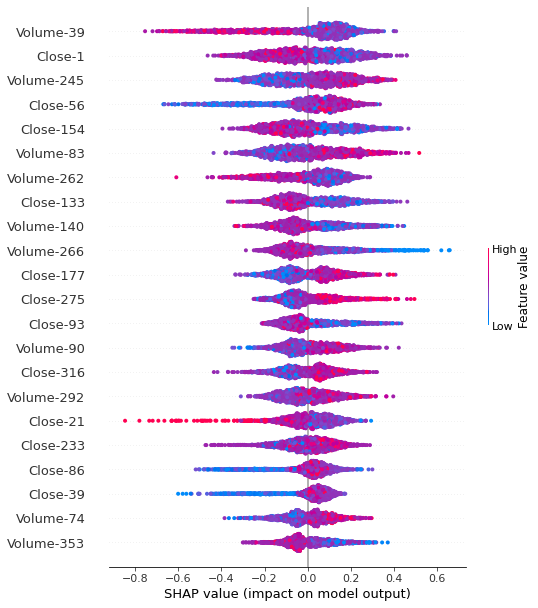

In [74]:
shap_values = shap.TreeExplainer(xgb).shap_values(X)
shap.summary_plot(shap_values, X, feature_names=full_dataset.columns.to_list()[:-1],show=False,max_display=22)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


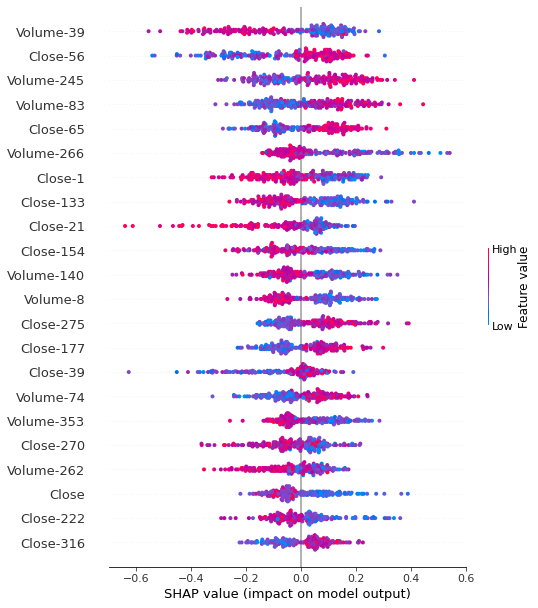

In [77]:
shap_values = shap.TreeExplainer(xgb).shap_values(X_test)
shap.summary_plot(shap_values, X_test, feature_names=full_dataset.columns.to_list()[:-1],show=False,max_display=22)

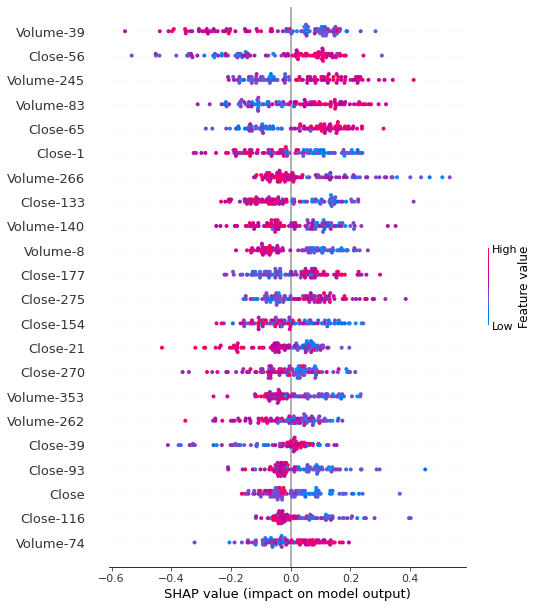

In [75]:
shap_values = shap.TreeExplainer(xgb).shap_values(X_test[y_test == y_pred])
shap.summary_plot(shap_values, X_test[y_test == y_pred], feature_names=full_dataset.columns.to_list()[:-1],show=False,max_display=22)

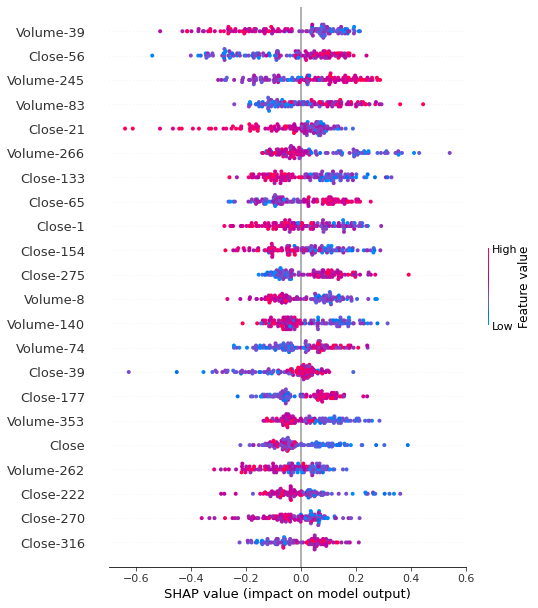

In [76]:
shap_values = shap.TreeExplainer(xgb).shap_values(X_test[y_test != y_pred])
shap.summary_plot(shap_values, X_test[y_test != y_pred], feature_names=full_dataset.columns.to_list()[:-1],show=False,max_display=22)